In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother
import spikeinterface
import spikeinterface.full as si

import helper_functions as helper
from spikeinterface.sorters import run_sorter_local

# Load the data

In [22]:
h5_file ='/mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_7_20240314_16_41_01.raw.h5'

'/mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_7_20240314_16_41_01.raw.h5'

In [23]:
import h5py

def read_h5_file(file_path):
    # Open the h5 file
    with h5py.File(file_path, 'r') as f:
        # Print the keys at the root level
        print("Root keys:", list(f.keys()))
        
        # Iterate over the keys at the root level
        for key in f.keys():
            print("Key:", key)
            
            # Check if the key is a group
            if isinstance(f[key], h5py.Group):
                # Print the keys within the group
                print("Group keys:", list(f[key].keys()))
                
                # Iterate over the keys within the group
                for sub_key in f[key].keys():
                    print("Sub key:", sub_key)
                    
                    # Check if the sub key is a dataset
                    if isinstance(f[key][sub_key], h5py.Dataset):
                        # Print the shape and data type of the dataset
                        print("Shape:", f[key][sub_key].shape)
                        print("Data type:", f[key][sub_key].dtype)
                        
                        # You can also access the data of the dataset using f[key][sub_key][...]
                        # For example, to print the first 10 elements of the dataset:
                        # print("Data:", f[key][sub_key][:10])
                        
            # Check if the key is a dataset
            elif isinstance(f[key], h5py.Dataset):
                # Print the shape and data type of the dataset
                print("Shape:", f[key].shape)
                print("Data type:", f[key].dtype)
                
                # You can also access the data of the dataset using f[key][...]
                # For example, to print the first 10 elements of the dataset:
                # print("Data:", f[key][:10])

# Example usage

read_h5_file(h5_file)


Root keys: ['assay', 'bits', 'data_store', 'environment', 'hdf_version', 'mxw_version', 'notes', 'recordings', 'version', 'wellplate', 'wells']
Key: assay
Group keys: ['inputs']
Sub key: inputs
Key: bits
Group keys: []
Key: data_store
Group keys: ['data0000']
Sub key: data0000
Key: environment
Group keys: ['diagnosis', 'temperature']
Sub key: diagnosis
Shape: (11,)
Data type: [(' Time', '<f8'), (' Loaded', '<f8'), ('VRefRampGen', '<f8'), ('VRefSC', '<f8'), ('VRefA', '<f8'), ('VRefIn', '<f8'), ('VADCEnd', '<f8'), ('VADCStart', '<f8'), ('VRefMOSR', '<f8'), ('RefElectrode 0', '<f8'), ('RefElectrode 1', '<f8'), ('RefElectrode 2', '<f8'), ('RefElectrode 3', '<f8'), ('RefElectrode 4', '<f8'), ('RefElectrode 5', '<f8'), ('VDDA', '<f8'), ('VDDB', '<f8'), ('VDDC', '<f8'), ('VDDD', '<f8'), ('VDDE', '<f8'), ('VDDP', '<f8'), ('VDDS', '<f8')]
Sub key: temperature
Shape: (10,)
Data type: [(' Time', '<f8'), ('heater_plate_upper', '<f8'), ('heater_plate_lower', '<f8'), ('recording_unit', '<f8'), ('hub

In [31]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
from spikeinterface.full import aggregate_channels,run_sorter_by_property
from probeinterface import generate_tetrode, ProbeGroup
import numpy as np

# Create a toy 384 channel recording with 4 shanks (each shank contain 96 channels)
recording, _ = se.toy_example(duration=[1.00], num_segments=1, num_channels=384)
four_shank_groupings = np.repeat([0, 1, 2, 3], 96)
recording.set_property("group", four_shank_groupings)
preprocessed_recordings = []
split_recordings_dict = recording.split_by("group")
#print(split_recordings_dict)
# loop over the recordings contained in the dictionary
for chan_group_rec in split_recordings_dict.values():
     print(chan_group_rec)
     # Apply the preprocessing steps to the channel group in isolation
     #shifted_recording = spre.phase_shift(chan_group_rec)

     filtered_recording = spre.bandpass_filter(chan_group_rec)

     referenced_recording = spre.common_reference(filtered_recording)

     preprocessed_recordings.append(referenced_recording)

 # Combine our preprocessed channel groups back together
combined_preprocessed_recording = aggregate_channels(preprocessed_recordings)
aggregate_sorting = run_sorter_by_property(
    sorter_name='kilosort2',
    recording=combined_preprocessed_recording ,
    grouping_property='group',
    working_folder='/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/toy_example',
    docker_image= "rohanmalige/benshalom:v3"
)
         

ChannelSliceRecording: 96 channels - 30.0kHz - 1 segments - 30,000 samples - 1.00s - float32 dtype 
                       10.99 MiB
ChannelSliceRecording: 96 channels - 30.0kHz - 1 segments - 30,000 samples - 1.00s - float32 dtype 
                       10.99 MiB
ChannelSliceRecording: 96 channels - 30.0kHz - 1 segments - 30,000 samples - 1.00s - float32 dtype 
                       10.99 MiB
ChannelSliceRecording: 96 channels - 30.0kHz - 1 segments - 30,000 samples - 1.00s - float32 dtype 
                       10.99 MiB


SpikeSortingError: Spike sorting in docker failed with the following error:
Traceback (most recent call last):
  File "/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/toy_example/in_container_sorter_script.py", line 23, in <module>
    sorting = run_sorter_local(
  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/runsorter.py", line 225, in run_sorter_local
    SorterClass.run_from_folder(output_folder, raise_error, verbose)
  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 293, in run_from_folder
    raise SpikeSortingError(
spikeinterface.sorters.utils.misc.SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 258, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/external/kilosortbase.py", line 217, in _run_from_folder
    raise Exception(f"{cls.sorter_name} returned a non-zero exit code")
Exception: kilosort2 returned a non-zero exit code

Spike sorting failed. You can inspect the runtime trace in /mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/toy_example/0/spikeinterface_log.json.


In [32]:
import glob

# Specify the directory path
directory_path = '/mnt/disk20tb/mandar_device_control/blocks/'

# Get all the h5 files in the directory
h5_files = glob.glob(directory_path + '/*.h5')

# Initialize an empty list to store the preprocessed recordings
rec_array = []

# Preprocessing steps for each h5 file
for idx, h5_file in enumerate(h5_files):
    # Perform the preprocessing steps for each h5 file
    print(f"Processing file: {h5_file}")
    recording = si.read_maxwell(h5_file, stream_id='well000')
    groupings = np.repeat([idx], recording.get_num_channels())
    recording.set_property("group", groupings)
    #recording = si.ConcatenateSegmentRecording([recording1,recording2])
    channel_ids = recording.get_channel_ids()
    fs = recording.get_sampling_frequency()
    num_chan = recording.get_num_channels()
    num_seg = recording.get_num_segments()
    total_recording = recording.get_total_duration()

    #print('Channel ids:', channel_ids)
    print('Sampling frequency:', fs)
    print('Number of channels:', num_chan)
    print('Number of segments:', num_seg)
    print(f"total_recording: {total_recording} s")
    recording_bp = si.bandpass_filter(recording, freq_min=300, freq_max=3000)
    recording_cmr = si.common_reference(recording_bp, reference='global', operator='median')
    recording_cmr = recording_cmr.frame_slice(start_frame= 0*fs,end_frame=10*fs)
    rec_array.append(recording_cmr)


Processing file: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_5_20240314_16_39_43.raw.h5
Sampling frequency: 10000.0
Number of channels: 464
Number of segments: 1
total_recording: 14.98 s
Processing file: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_9_20240314_16_42_19.raw.h5
Sampling frequency: 10000.0
Number of channels: 693
Number of segments: 1
total_recording: 14.98 s
Processing file: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_4_20240314_16_39_05.raw.h5
Sampling frequency: 10000.0
Number of channels: 546
Number of segments: 1
total_recording: 15.02 s
Processing file: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_2_20240314_16_37_48.raw.h5
Sampling frequency: 10000.0
Number of channels: 546
Number of segments: 1
total_recording: 14.98 s
Processing file: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_10_20240314_16_42_58.raw.h

In [21]:
recording = si.read_maxwell(h5_file, stream_id='well000')
recording.has_probe


<bound method BaseRecordingSnippets.has_probe of MaxwellRecordingExtractor: 693 channels - 10.0kHz - 1 segments - 149,800 samples - 14.98s 
                           uint16 dtype - 198.00 MiB
  file_path: /mnt/disk20tb/mandar_device_control/blocks/recording_chip_id_M07039_block_id_7_20240314_16_41_01.raw.h5>

In [33]:
big_recording = si.aggregate_channels(rec_array)

In [37]:
big_recording.get_channel_groups()


array([ 0,  0,  0, ..., 12, 12, 12])

## RUnnig sorting

In [38]:
#aggregated_rec= aggregated_rec.save(fodler="./sorting/recordingtest",progress_bar=True,verbose=True)
output_folder = "./sorting/device_control_blocks_KS"
docker_image= "rohanmalige/benshalom:v3"
default_KS2_params = si.get_default_sorter_params('kilosort2')
print(default_KS2_params)
#default_KS2_params['keep_good_only'] = True
default_KS2_params['detect_threshold'] = 5.5
# default_KS2_params['projection_threshold']=[18, 10]
default_KS2_params['n_jobs'] = 4
# global_job_kwargs = dict(n_jobs=32, total_memory="8G", progress_bar=True)
# si.set_global_job_kwargs(**global_job_kwargs)
#run_sorter = si.run_sorter('kilosort2',recording=big_recording, output_folder=output_folder,docker_image= docker_image,verbose=True,remove_existing_folder=True, **default_KS2_params)
aggregate_sorting = run_sorter_by_property(
    sorter_name='kilosort2',
    recording=big_recording ,
    grouping_property='group',
    working_folder='/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis/sorting/aggrgated_channels/',
    docker_image= "rohanmalige/benshalom:v3"
)
## if running on NERSC:
#run_sorter_local("kilosort2",recording_chunk, output_folder="./sorting/FolicAcid10mg", delete_output_folder=False,verbose=True,with_output=True,**default_KS2_params)
#run_sorter = ss.run_sorter('kilosort2',recording= recording_chunk, output_folder="/mnt/disk15tb/mmpatil/Spikesorting/sorter_output/kilosort2",docker_image= True,verbose=True, **default_KS2_params)

{'detect_threshold': 6, 'projection_threshold': [10, 4], 'preclust_threshold': 8, 'momentum': [20.0, 400.0], 'car': True, 'minFR': 0.1, 'minfr_goodchannels': 0.1, 'freq_min': 150, 'sigmaMask': 30, 'lam': 10.0, 'nPCs': 3, 'ntbuff': 64, 'nfilt_factor': 4, 'NT': None, 'AUCsplit': 0.9, 'wave_length': 61, 'keep_good_only': False, 'skip_kilosort_preprocessing': False, 'scaleproc': None, 'save_rez_to_mat': False, 'delete_tmp_files': ('matlab_files',), 'delete_recording_dat': False, 'n_jobs': 48, 'chunk_duration': '1s', 'progress_bar': True, 'mp_context': None, 'max_threads_per_process': 1}


In [42]:
aggregate_sorting=aggregate_sorting.remove_empty_units()
aggregate_sorting.get_unit_ids()
sortingKS3= aggregate_sorting.save(folder = './sorting/aggrgated_channels2',overwrite=True)

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/core/basesorting.py:239: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


In [4]:

# loading the KS2 sorted object
sortingKS3 = run_sorter.remove_empty_units()
sortingKS3 = si.remove_excess_spikes(sortingKS3,recording1) #Sometimes KS returns spikes outside the number of samples. < https://github.com/SpikeInterface/spikeinterface/pull/1378>

sortingKS3= sortingKS3.save(folder = './sorting/organoid_802F_ks2',overwrite=True)
#sorting_KS3 = s.Kilosort2Sorter._get_result_from_folder('./sorting/FolicAcidT2M07038_2_KS/sorter_output')
total_units = sortingKS3.get_unit_ids()
print(len(total_units))
#print(len(total_units))
channel_ids = recording_chunk.get_channel_ids()
print(channel_ids)



294
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' '178' '179' '180' '181' '182' 

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/core/basesorting.py:239: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")



job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=False)
sorting_analyzer = spikeinterface.core.create_sorting_analyzer(sortingKS3, recording_chunk,
                                              format="binary_folder", folder="./my_sorting_analyzer",
                                              **job_kwargs)
sorting_analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
sorting_analyzer.compute("waveforms", **job_kwargs)
sorting_analyzer.compute("templates")
sorting_analyzer.compute("noise_levels")
sorting_analyzer.compute("unit_locations", method="monopolar_triangulation")
sorting_analyzer.compute("isi_histograms")
sorting_analyzer.compute("correlograms", window_ms=100, bin_ms=5.)
sorting_analyzer.compute("principal_components", n_components=3, mode='by_channel_global', whiten=True, **job_kwargs)
sorting_analyzer.compute("quality_metrics", metric_names=["snr", "firing_rate"])
sorting_analyzer.compute("spike_amplitudes", **job_kwargs)

In [3]:
sorting_KS3 = si.Kilosort2Sorter._get_result_from_folder('./sorting/organoid_802f/sorter_output')

## Extracting the waveforms

In [44]:

job_kwargs = dict(n_jobs=32, chunk_duration="1s", progress_bar=True)
#waveforms = si.extract_waveforms(recording_chunk,sorting_KS3,folder="./waveformsblock1_7min",overwrite=True, ms_before=1., ms_after=2.,**job_kwargs)

big_recording.annotate(is_filtered=True)
waveforms = si.extract_waveforms(big_recording,sortingKS3,folder='./sorting/aggregated_channels_WF',sparse=False,overwrite=True,**job_kwargs)
print(waveforms)

extract waveforms memmap multi buffer:   0%|          | 0/10 [00:00<?, ?it/s]

WaveformExtractor: 7834 channels - 948 units - 1 segments
  before:10 after:20 n_per_units:500


In [4]:
waveforms = si.load_waveforms('./sorting/organoids_802F_WF')

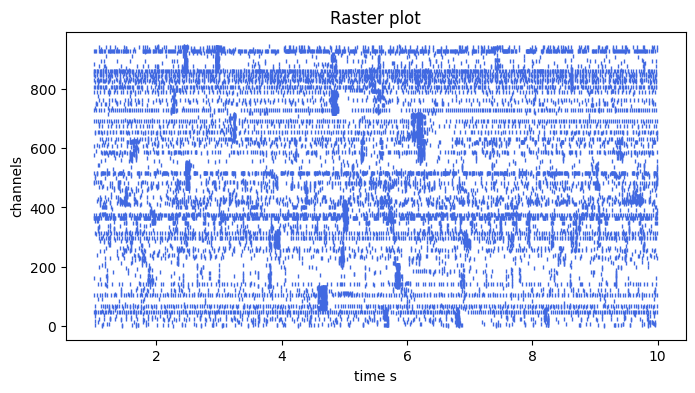

In [46]:
fig, ax1 = plt.subplots(figsize=(8,4))
spike_times = {}
for idx, unit_id in enumerate(waveforms.unit_ids):
    #print(unit_id)
    spike_train = sortingKS3.get_unit_spike_train(unit_id,start_frame=1*fs,end_frame=120*fs)
    #print(spike_train)
    if len(spike_train) > 0:
        spike_times[idx] = spike_train / float(fs)
        #print(spike_times[unit_id])
       # print(unit_id*np.ones_like(spike_times[unit_id]))
        # ax1.plot(spike_times[idx],waveforms.channel_ids_to_indices([str(int(extremum_channels_ids[unit_id]))])*np.ones_like(spike_times[idx]),
        #                      marker='|', mew=1, markersize=3,
        #                      ls='',color='royalblue')
        ax1.plot(spike_times[idx],unit_id*np.ones_like(spike_times[idx]),
                             marker='|', mew=1, markersize=3,
                             ls='',color='royalblue')
        ax1.set_title('Raster plot')
        ax1.set_xlabel('time s')
        ax1.set_ylabel("channels")
        #ax1.set_yticks(range(16))
#plt.savefig('./plots/sortedunitsraster.pdf',format='pdf')

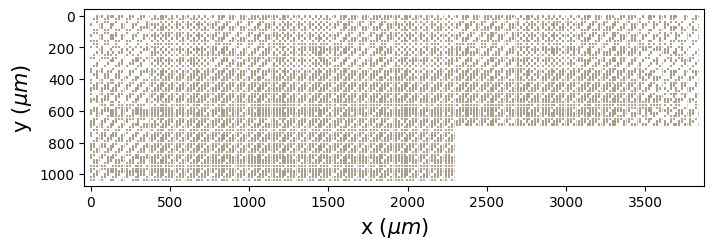

In [48]:
fig,ax = plt.subplots(figsize=(8,8))
si.plot_probe_map(big_recording,ax=ax,with_channel_ids=False)
ax.invert_yaxis()

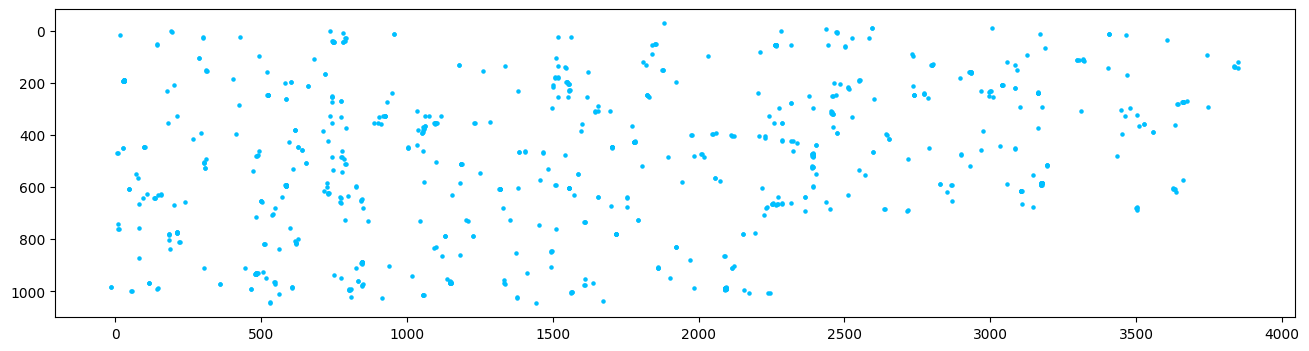

In [53]:
fig,ax = plt.subplots(figsize=(16,4))
locations = si.compute_unit_locations(waveforms)
for x,y,z in locations:
    ax.scatter(x,y, s=5,c='deepskyblue')
ax.invert_yaxis()

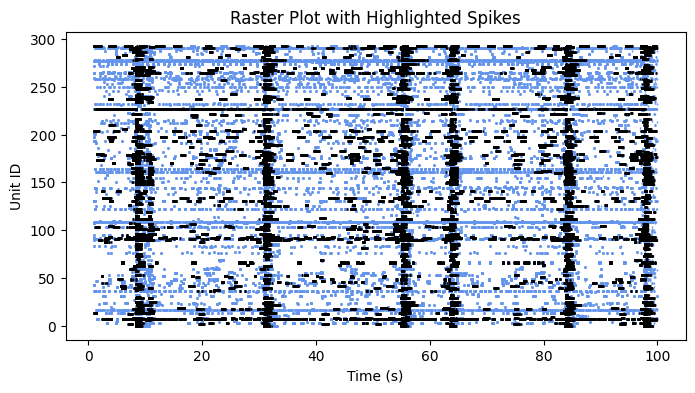

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
window_size = 1.0  # seconds
step_size = 0.1    # seconds
threshold = 10 / window_size   # Hz

# Preparation for optimized plotting
spike_times_red = []  # Spikes exceeding threshold
spike_indices_red = []
spike_times_blue = []  # Spikes below threshold
spike_indices_blue = []

# Use vectorized operations for moving window analysis
for idx, spike_times_array in spike_times.items():
    end_times = np.arange(window_size, np.max(spike_times_array) + step_size, step_size)
    start_times = end_times - window_size
    
    # Compute the number of spikes in each window using vectorization
    for start_time, end_time in zip(start_times, end_times):
        spikes_in_window = spike_times_array[(spike_times_array >= start_time) & (spike_times_array < end_time)]
        spiking_rate = len(spikes_in_window) / window_size
        
        # Classify and collect spikes based on threshold
        if spiking_rate >= threshold:
            spike_times_red.extend(spikes_in_window)
            spike_indices_red.extend([idx] * len(spikes_in_window))
        else:
            spike_times_blue.extend(spikes_in_window)
            spike_indices_blue.extend([idx] * len(spikes_in_window))

# Plotting in a single call per color
plt.figure(figsize=(8, 4))
plt.plot(spike_times_blue, spike_indices_blue,marker= '|',color='cornflowerblue', markersize=1,ls='', label='Below Threshold')
plt.plot(spike_times_red, spike_indices_red, marker='|',color='black', markersize=1, ls='',label='Above Threshold')
plt.title('Raster Plot with Highlighted Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')
#plt.legend()
plt.show()

In [ ]:
window_size = 1.0  # Window size in seconds
step_size = 0.1    # Step size in seconds
threshold = 50 /window_size    # Spiking rate threshold in Hz

# Placeholder for demonstration: replace with your method to obtain unit IDs and spike trains
 # Example unit IDs
#get_unit_spike_train = lambda unit_id, start_frame, end_frame: np.array([...])  # Example function

# Initialize lists for classified spike times
spike_times_below_threshold = []
spike_indices_below_threshold = []
spike_times_above_threshold = []
spike_indices_above_threshold = []

# Process each unit
for unit_id in waveforms.unit_ids:
    spike_train = sorting_KS3.get_unit_spike_train(unit_id, start_frame=0, end_frame=120*fs)
    print(spike_train)
    spike_times = spike_train / fs  # Convert to seconds

    # Moving window analysis
    for window_start in np.arange(0, np.max(spike_times), step_size):
        window_end = window_start + window_size
        spikes_in_window = spike_times[(spike_times >= window_start) & (spike_times < window_end)]

        # Calculate the spiking rate
        spiking_rate = len(spikes_in_window) / window_size

        # Classify and store spike times based on the threshold
        if spiking_rate >= threshold:
            spike_times_above_threshold.extend(spikes_in_window)
            spike_indices_above_threshold.extend([unit_id] * len(spikes_in_window))
        else:
            spike_times_below_threshold.extend(spikes_in_window)
            spike_indices_below_threshold.extend([unit_id] * len(spikes_in_window))

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(spike_times_blue, spike_indices_blue,marker= '|',color='cornflowerblue', markersize=1,ls='', label='Below Threshold')
plt.plot(spike_times_red, spike_indices_red, marker='|',color='black', markersize=1, ls='',label='Above Threshold')
plt.title('Raster Plot with Highlighted Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')
#plt.legend()
plt.show()
#

In [41]:
from scipy.io import loadmat

# Load the data
spikeTimes = loadmat('/mnt/disk15tb/mmpatil/MxW_Matlab_22.2/MxW_Matlab_22.2/getting_started/tutorials/basic_scripts/spikeTimes.mat')['spikeTimes']
channels = loadmat('/mnt/disk15tb/mmpatil/MxW_Matlab_22.2/MxW_Matlab_22.2/getting_started/tutorials/basic_scripts/channels.mat')['channels']

In [47]:
# Assuming spikeTimes and channels are stored in arrays within the 'spike_data' and 'channel_data' dictionaries
spikeTimes_matlab = spikeTimes[0]
channels_matlab = channels[0]

# Convert to a Python dictionary: {channel: spike_times_array}
spike_times = {ch[0]: st[0].flatten() for ch, st in zip(channels_matlab, spikeTimes_matlab)}

# The rest of the code is similar to what you have, with some minor adjustments
window_size = 1.0  # seconds
step_size = 0.1    # seconds
threshold = 10 / window_size   # Hz

# Preparation for optimized plotting
spike_times_red = []  # Spikes exceeding threshold
spike_indices_red = []
spike_times_blue = []  # Spikes below threshold
spike_indices_blue = []

# Use vectorized operations for moving window analysis
for idx, spike_times_array in spike_times.items():
    end_times = np.arange(window_size, spike_times_array.max() + step_size, step_size)
    start_times = end_times - window_size
    
    # Compute the number of spikes in each window using vectorization
    for start_time, end_time in zip(start_times, end_times):
        spikes_in_window = spike_times_array[(spike_times_array >= start_time) & (spike_times_array < end_time)]
        spiking_rate = len(spikes_in_window) / window_size
        
        # Classify and collect spikes based on threshold
        if spiking_rate >= threshold:
            spike_times_red.extend(spikes_in_window)
            spike_indices_red.extend([idx] * len(spikes_in_window))
        else:
            spike_times_blue.extend(spikes_in_window)
            spike_indices_blue.extend([idx] * len(spikes_in_window))

# Plotting in a single call per color
plt.figure(figsize=(8, 4))
plt.plot(spike_times_blue, spike_indices_blue, 'b|', markersize=1, label='Below Threshold')
plt.plot(spike_times_red, spike_indices_red, 'r|', markersize=1, label='Above Threshold')
plt.title('Raster Plot with Highlighted Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Channel ID')
plt.legend()
plt.show()

IndexError: invalid index to scalar variable.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1017,) + inhomogeneous part.

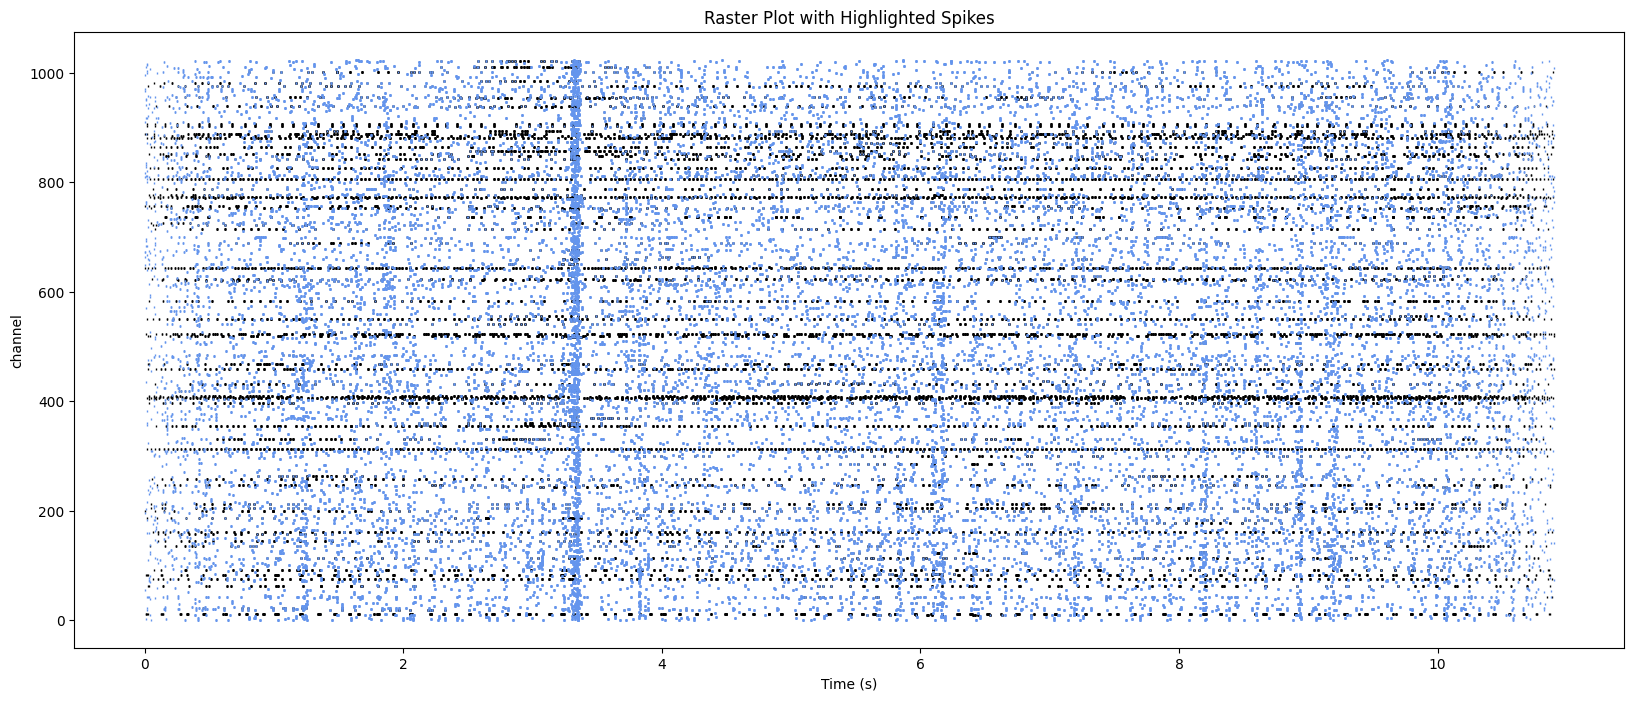

In [65]:
# Convert to Python lists
spikeTimes_list = [spikeTimes[i][0] for i in range(len(spikeTimes))]
channels_list = [channels[i][0] for i in range(len(channels))]
window_size = 1.0  # Window size in seconds
step_size = 0.1    # Step size in seconds
threshold = 10 /window_size    # Spiking rate threshold in Hz

# Placeholder for demonstration: replace with your method to obtain unit IDs and spike trains
 # Example unit IDs
#get_unit_spike_train = lambda unit_id, start_frame, end_frame: np.array([...])  # Example function

# Initialize lists for classified spike times
spike_times_below_threshold = []
spike_indices_below_threshold = []
spike_times_above_threshold = []
spike_indices_above_threshold = []
# Create a raster plot

# Plot spikes
for i, spikes in enumerate(spikeTimes_list):
    channel = channels_list[i]
    # Moving window analysis
    spike_times = np.array(spikes)
    for window_start in np.arange(0, np.max(10), step_size):
        window_end = window_start + window_size
        spikes_in_window = spike_times[(spike_times >= window_start) & (spike_times < window_end)]

        # Calculate the spiking rate
        spiking_rate = len(spikes_in_window) / window_size

        # Classify and store spike times based on the threshold
        if spiking_rate >= threshold:
            spike_times_above_threshold.extend(spikes_in_window)
            spike_indices_above_threshold.extend([channel] * len(spikes_in_window))
        else:
            spike_times_below_threshold.extend(spikes_in_window)
            spike_indices_below_threshold.extend([channel] * len(spikes_in_window))


    

# Visualization
plt.figure(figsize=(20, 8))
plt.plot(spike_times_above_threshold, spike_indices_above_threshold,marker= '|',color='black', markersize=1,ls='', label='Above Threshold')
plt.plot(spike_times_below_threshold, spike_indices_below_threshold, marker='|',color='cornflowerblue', markersize=1, ls='',label='Below Threshold')
plt.title('Raster Plot with Highlighted Spikes')
plt.xlabel('Time (s)')
plt.ylabel('channel')
#plt.legend()
plt.show()

In [40]:
channels = channels.flatten()
channels

array([   1,    2,    3, ..., 1022, 1023, 1024], dtype=int32)

In [24]:
# Dictionary to store the instantaneous frequencies for each unit
instantaneous_frequencies = {}

for unit_id in waveforms.unit_ids:
    spike_train = sorting_KS3.get_unit_spike_train(unit_id, start_frame=0, end_frame=120*fs) / fs  # Convert to seconds
    
    # Calculate differences between consecutive spike times
    spike_intervals = np.diff(spike_train)
    
    # Calculate instantaneous frequencies (Hz) and handle division by zero for isolated spikes
    with np.errstate(divide='ignore', invalid='ignore'):
        instantaneous_freq = 1.0 / spike_intervals
        instantaneous_freq[np.isinf(instantaneous_freq)] = 0  # Optional: set infinite frequencies to 0 or another value
    
    # Store the instantaneous frequencies
    instantaneous_frequencies[unit_id] = instantaneous_freq

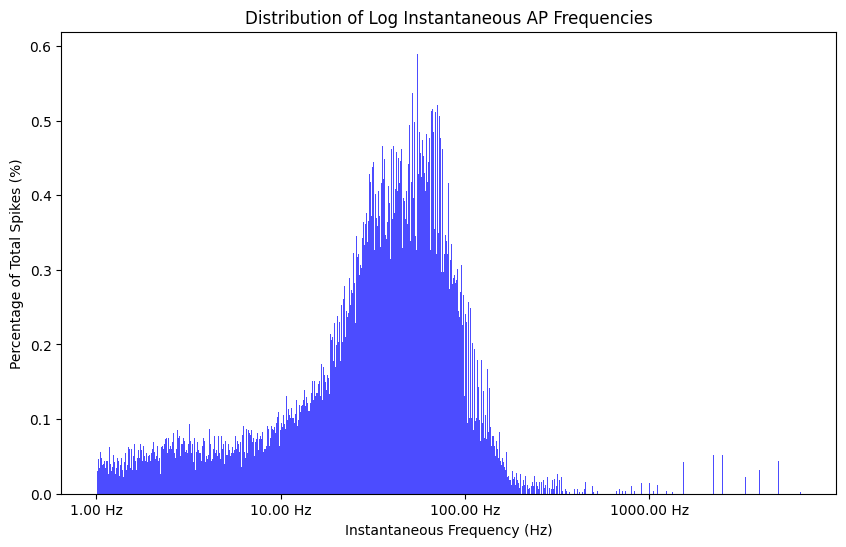

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def log_to_hertz(value, pos):
    # Use e^value to invert the logarithm and obtain the original frequency
    return f"{np.exp(value):.2f} Hz"
# Aggregate all instantaneous frequencies across units
all_instantaneous_freqs = np.concatenate(list(instantaneous_frequencies.values()))
# Filter out non-positive frequencies to avoid undefined log values
positive_freqs = all_instantaneous_freqs[all_instantaneous_freqs > 1]

# Calculate the logarithm of positive frequencies
log_freqs = np.log(positive_freqs)
plt.figure(figsize=(10, 6))
weights = np.ones_like(log_freqs) / len(log_freqs) * 100
# Plot histogram
n, bins, patches = plt.hist(log_freqs, bins=1000, weights=weights, alpha=0.7, color='blue')

# Set the formatter for the x-axis
formatter = FuncFormatter(log_to_hertz)
plt.gca().xaxis.set_major_formatter(formatter)
 
# Set specific ticks at 1 Hz, 10 Hz, 100 Hz, and 1000 Hz
desired_ticks = [np.log(1), np.log(10), np.log(100), np.log(1000)]
plt.xticks(desired_ticks)

plt.xlabel('Instantaneous Frequency (Hz)')
plt.ylabel('Percentage of Total Spikes (%)')
plt.title('Distribution of Log Instantaneous AP Frequencies')

plt.show()

In [8]:
spike_train.shape

(765,)

In [ ]:
#si.export_to_phy(waveform_extractor=waveforms,output_folder='./sorting/SPTAN1_1_16793_phy',**job_kwargs)

In [13]:
extremum_channels_ids =si.get_template_extremum_channel(waveforms,peak_sign ='neg',mode='at_index')
extremum_channels_ids

{0: '1',
 1: '5',
 2: '575',
 4: '11',
 5: '12',
 6: '21',
 7: '22',
 8: '225',
 9: '59',
 10: '539',
 12: '45',
 13: '45',
 14: '575',
 15: '50',
 16: '50',
 17: '14',
 18: '218',
 19: '85',
 20: '64',
 21: '562',
 22: '217',
 23: '68',
 24: '657',
 25: '73',
 26: '244',
 27: '48',
 28: '764',
 29: '74',
 30: '74',
 31: '263',
 32: '69',
 34: '90',
 35: '91',
 36: '91',
 37: '91',
 38: '91',
 39: '713',
 40: '99',
 41: '69',
 42: '111',
 43: '113',
 44: '114',
 45: '12',
 46: '181',
 47: '118',
 48: '125',
 49: '128',
 50: '128',
 52: '637',
 54: '141',
 55: '146',
 56: '166',
 57: '151',
 58: '3',
 59: '159',
 60: '163',
 61: '226',
 62: '167',
 63: '167',
 64: '167',
 65: '167',
 66: '167',
 67: '891',
 68: '264',
 69: '178',
 70: '59',
 71: '242',
 72: '652',
 74: '207',
 75: '571',
 76: '212',
 77: '213',
 78: '213',
 79: '213',
 80: '216',
 82: '224',
 83: '228',
 84: '228',
 85: '239',
 86: '239',
 87: '204',
 88: '261',
 89: '247',
 90: '247',
 91: '539',
 92: '5',
 93: '10',
 

In [27]:

for i, unit_id in enumerate(waveforms.unit_ids):
    fig, ax = plt.subplots()
    
    wf = waveforms.get_waveforms(unit_id)
    #print(wf.shape)
    #print(int(extremum_channels[unit_id]))
    channel_id_str = str(int(extremum_channels_ids[unit_id]))
    number = waveforms.channel_ids_to_indices([channel_id_str])
    #number =[539]
    #print(number)
    ax.plot(wf[:,:, number[0]].T,  lw=1, color='black', alpha=0.1, linestyle='-', marker='', markersize=0)
    ax.set_title(f"waveforms of a putative neuron")
    ax.set_ylabel("Amplitude (µV)")
    ax.set_xlabel("Sampled timepoints (5e-2 ms)")
    ax.set_facecolor('white')  # Set the background color to black

    # Customize the appearance of tick labels and axes
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    # ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    # ax.spines['left'].set_color('white')
    
    plt.savefig(f'/home/mmp/Documents/Org_KMB_802F_waveforms/waveforms_unit_id_{unit_id}__channel_id_{channel_id_str}_channel_index_{number[0]}.svg', format='svg',dpi=300)
    plt.close(fig)


In [61]:

job_kwargs = dict(n_jobs=16, chunk_duration="1s", progress_bar=True)
sp.compute_spike_amplitudes(waveforms,load_if_exists=True,**job_kwargs)
metrics = qm.compute_quality_metrics(waveforms,load_if_exists=False,**job_kwargs)

extract amplitudes:   0%|          | 0/300 [00:00<?, ?it/s]

/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 55, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 122, 124, 125, 126, 127, 129, 130, 131, 133, 135, 136, 137, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 165, 167, 169, 171, 172, 173, 175, 177, 179, 180, 181, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 210, 211, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 25

In [62]:
import mea_analysis_pipeline
import importlib
importlib.reload(mea_analysis_pipeline)
updated_metrics = mea_analysis_pipeline.remove_violated_units(metrics)

In [63]:
non_violated = updated_metrics.index
print(len(non_violated))

438


{0: array([1028.39176295,  305.05766872,    4.83490971]), 1: array([1056.20117303,  128.83362256,    3.45669084]), 2: array([773.89625134,  32.37397754,   1.75231825]), 3: array([933.30935212, 259.77429838,   8.8820764 ]), 4: array([950.4499648 , 240.24987071,   4.14636735]), 5: array([752.3577603 , 268.97970665,   2.88462844]), 6: array([768.89585118,  17.22187986,   1.24945802]), 7: array([855.71335624,  55.92142665,  12.94203143]), 8: array([855.29792135,  56.91906134,  57.55491788]), 9: array([1029.0178007 ,  304.84246614,    6.3118845 ]), 10: array([922.88556751, 326.42751533,   6.61201197]), 11: array([1074.87916221,  360.07368181,   13.6001644 ]), 12: array([954.77922561,  11.31380842,   4.7793845 ]), 13: array([955.36930885,  11.28579769,   3.94631672]), 14: array([915.06823865, 343.59395533,   3.15135355]), 15: array([1178.80763834,  131.5419072 ,    2.30074726]), 16: array([1516.88153475,  297.91448691,   12.97811054]), 17: array([1523.61403692,  135.66335719,    1.73940149])

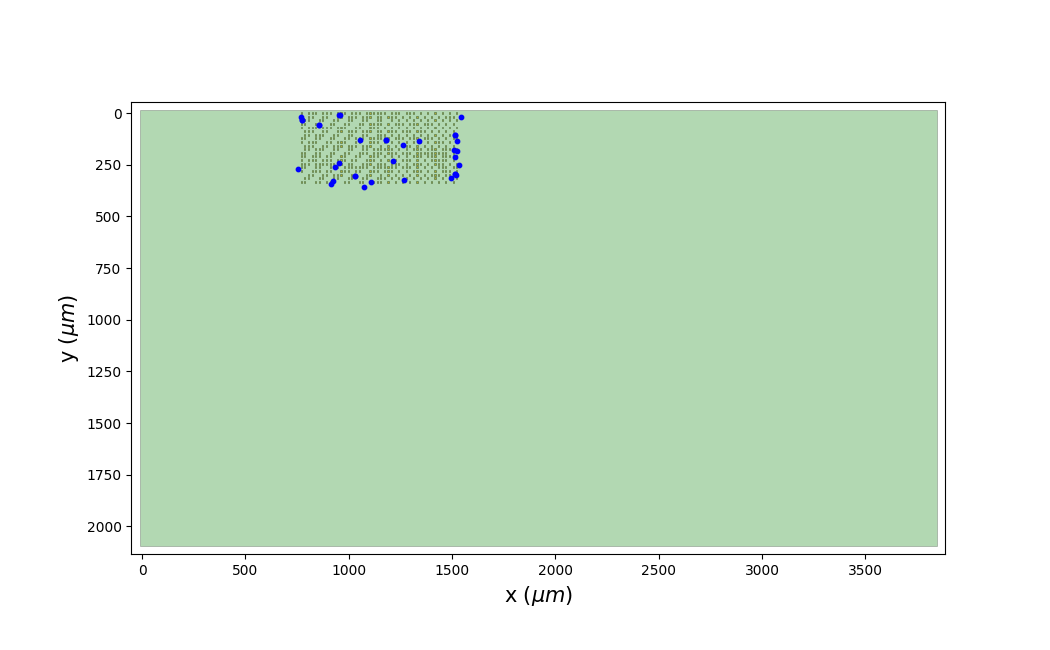

In [14]:

#locations = sp.compute_unit_locations(waveforms)
#non_violated = updated_metrics.index
unit_ids = waveforms.unit_ids
locations = si.compute_unit_locations(waveforms)
#print(locations)
unit_locations =dict(zip(unit_ids,locations))
print(unit_locations)
#np.savetxt("unitloc_10mins.txt",locations)
fig,ax = plt.subplots(figsize=(10.5,6.5))
si.plot_probe_map(recording1,ax=ax,with_channel_ids=False)
#ax.set_facecolor('#000000') 
#print(len(non_violated))
for unit_id, (x,y,z) in unit_locations.items() :
    #if unit_id in non_violated:
    ax.scatter(x,y, s=10,c='blue')
    
ax.invert_yaxis()
#plt.savefig(f'/home/mmp/Documents/NeuronalUnitsExperiment/NU_01.svg',format='svg')

In [76]:
print(len(templates))
templates.shape

438


(438, 30, 1004)

In [4]:
import spikeinterface.full as si
local_path= '/mnt/disk20tb/PrimaryNeuronData/Maxtwo/Folic_Acid_T2/Folic_Acid_T2/240206/M07039/Network/000036/data.raw.h5' #network data from chip 16848


recording1 = si.read_maxwell(local_path,stream_id='well000')
#sortingKS3 = si.Kilosort2Sorter._get_result_from_folder('/mnt/disk15tb/mmpatil/MEA_Analysis/AnalyzedData/Folic_Acid_T2/Folic_Acid_T2/240206/M07039/Network/000036/kilosort2__well000_rec0000/')
waveforms=si.load_waveforms('/mnt/disk15tb/mmpatil/MEA_Analysis/AnalyzedData/Folic_Acid_T2/Folic_Acid_T2/240206/M07039/Network/000036/waveforms_well000_rec0000/')
job_kwargs = dict(n_jobs=16, chunk_duration="1s", progress_bar=True)

metrics = si.compute_quality_metrics(waveforms,load_if_exists=False,**job_kwargs)



/home/mmp/.local/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [0, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 28, 30, 31, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 47, 48, 49, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 125, 126, 127, 128, 129, 130, 133, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177, 179, 180, 181, 182, 183, 184, 186, 187, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 207, 208, 209, 210, 211, 213, 214, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 253, 257,

NameError: name 'mea_analysis_pipeline' is not defined

In [5]:
import mea_analysis_pipeline
updated_metrics = mea_analysis_pipeline.remove_violated_units(metrics)
non_violated = updated_metrics.index.values


In [8]:
si.compute_unit_locations

384

In [7]:
qual_metrics = metrics.loc[non_violated]
qual_metrics.to_excel(f"./quality_metrics.xlsx")

In [111]:
import os
extremum_channels_ids =si.get_template_extremum_channel(waveforms,peak_sign ='neg',mode='at_index')
templates = waveforms.get_all_templates(unit_ids=non_violated.values)
output_folder = '/home/mmp/Documents/templates_plots_NU_2'
channel_ids = recording1.get_channel_ids()
# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for idx,unit_id in enumerate(non_violated.values):
    template = templates[idx]
    fig, ax = plt.subplots()
    plt.plot(template, color='black', alpha=0.5)
    plt.plot(template[:,list(channel_ids).index(extremum_channels_ids[unit_id])] , color='red')
                                            
    plt.savefig(os.path.join(output_folder, f'template_unit_{unit_id}.png'))
    plt.close(fig)



In [121]:
spike_trains = []
for unit_id in non_violated.values:
    spike_train = sortingKS3.get_unit_spike_train(unit_id=unit_id)
    spike_trains.append(spike_train)




In [127]:
fs=recording1.get_sampling_frequency()
t_start = 0 
t_end = int(300 * fs)
dt = 1
frame_numbers = t_end
spike_array = np.zeros((len(non_violated.values),frame_numbers), dtype= int)
for idx, unit_id in enumerate(non_violated.values):
    spike_train = sortingKS3.get_unit_spike_train(unit_id,start_frame=t_start,end_frame=t_end)
    for spike_time in spike_train:
        spike_array[idx,spike_time] = 1


In [128]:
spike_array.shape

(384, 3000000)

In [129]:
import scipy.signal as signal

# Define the original sampling frequency and the target sampling frequency
original_fs = recording1.get_sampling_frequency()
target_fs = 100

# Calculate the resampling factor
resampling_factor = original_fs / target_fs

# Resample the spike_array
downsampled_spike_array = signal.resample(spike_array, int(spike_array.shape[1] / resampling_factor), axis=1)


In [130]:
downsampled_spike_array.shape

(384, 30000)

In [ ]:
import numpy as np
import scipy.io as sio

# Save as .npz format
np.savez('NU_2_FA_M05506_spike_array.npz', data=downsampled_spike_array)

# Save as .mat format
sio.savemat('NU_2_FA_M05506_spike_array.mat', {'data': downsampled_spike_array})
